# 最終課題

## 課題

2001年から2022年までの11月の日単位の気象観測データ 660 件が格納されたファイル  
（Tokyo_Nov2001-2022.csv）を用いて、以下のデータ解析を行うこと。

### 設問1（クラスタリング）

最高気温と最低気温に基づいてデータ 660 件を3つのクラスタに分割せよ。  
なお、クラスタリング結果は散布図で表示すること。

### 設問2（分類）

天気概況昼以外の属性を用いて、「晴の日」かどうかを予測するモデルを作成せよ。  
なお、「晴の日」とは「天気概況昼」に「晴」が含まれる日である。予測精度を正解率  
(accuracy)で評価すること。（目標精度: 95%以上）

### 設問3（回帰）

最高気温以外の属性を用いて、最高気温を予測するモデルを作成せよ。  
なお、予測精度をRMSE(Root Mean Squre Error)で評価すること。（目標誤差:1.7℃以下）

In [22]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Meiryo'

#CSVの内容を持ってきている
dataset = pd.read_csv('Tokyo_Nov2001-2022.csv', encoding='cp932')
#ヘッダーを決めている
dataset.columns = ['年','月','日','最高気温','最低気温','降水量','日照時間',
                   '最大風速','最大風向','天気概況昼','天気概況夜']
#晴れの日の列を追加した
dataset['晴の日'] = dataset['天気概況昼'].str.contains('晴')
dataset

,年,月,日,最高気温,最低気温,降水量,日照時間,最大風速,最大風向,天気概況昼,天気概況夜,晴の日
0,2001,11,1,21.4,14.2,0.0,4.9,5.4,南西,晴後曇,晴一時曇,True
1,2001,11,2,21.8,14.5,0.0,7.2,5.2,東,晴後薄曇,曇,True
2,2001,11,3,18.1,12.2,29.0,0.3,8.7,北,曇後雨,雨,False
3,2001,11,4,19.2,11.6,4.5,8.5,7.5,北,晴,晴後一時薄曇,True
4,2001,11,5,16.1,9.0,11.0,2.2,3.8,北北西,曇一時晴,雨,True
...,...,...,...,...,...,...,...,...,...,...,...,...
655,2022,11,26,16.6,10.5,1.0,0.8,3.5,西北西,曇一時雨,晴一時曇,False
656,2022,11,27,19.2,10.8,0.0,9.0,5.8,北西,快晴,曇時々晴,True
657,2022,11,28,14.3,8.4,0.0,0.1,3.1,北西,曇,曇一時晴,False
658,2022,11,29,21.3,11.6,10.5,0.0,7.4,南,曇時々雨,大雨時々曇,False


In [3]:
#基本統計量の表示
dataset.describe()

,年,月,日,最高気温,最低気温,降水量,日照時間,最大風速
count,660.000000,660.0,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,2011.500000,11.0,15.500000,17.338030,10.102727,3.275000,5.068333,5.308636
std,6.349101,0.0,8.662006,3.212168,2.788693,9.609116,3.659458,1.603345
min,2001.000000,11.0,1.000000,8.500000,0.300000,0.000000,0.000000,2.700000
25%,2006.000000,11.0,8.000000,14.900000,8.200000,0.000000,0.900000,4.100000
50%,2011.500000,11.0,15.500000,17.500000,10.000000,0.000000,5.900000,4.950000
75%,2017.000000,11.0,23.000000,19.700000,12.000000,1.000000,8.700000,6.200000
max,2022.000000,11.0,30.000000,25.900000,18.500000,85.000000,10.200000,11.900000


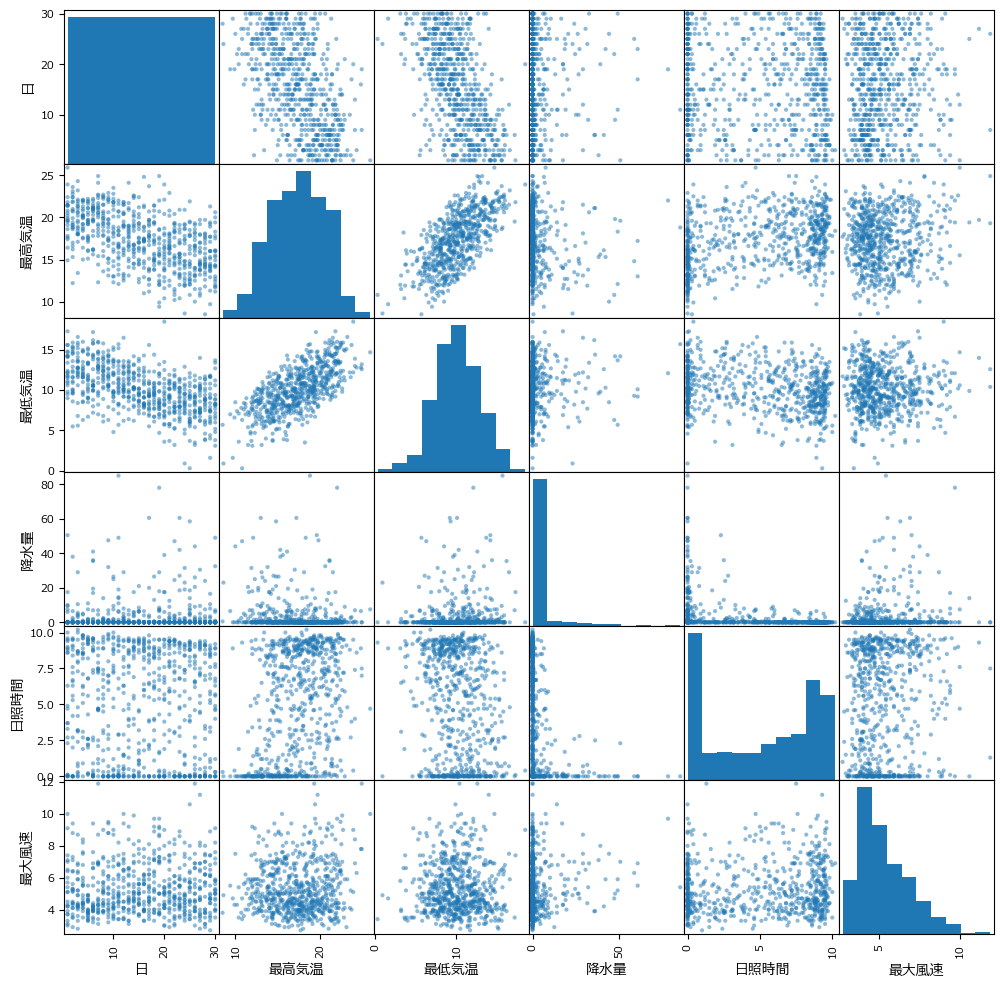

In [4]:
#データのグラフをそれぞれ表したもの
pd.plotting.scatter_matrix(dataset.iloc[:, 2:9], figsize=(12, 12))
plt.show()

### 解答

次のセルに学籍番号と氏名を記入し、その下のセルにプログラムを記述すること（複数セルにまたっがても可）

In [5]:
gakuban = '00EC070' # あなたの学籍番号
yourname = '高矢空' # あなたの氏名

### 設問1（クラスタリング）

In [6]:
%where pip
%pip install -U pip
%pip install scikit-learn
%pip install -U scikit-learn

UsageError: Line magic function `%where` not found.


C:\Users\DE\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


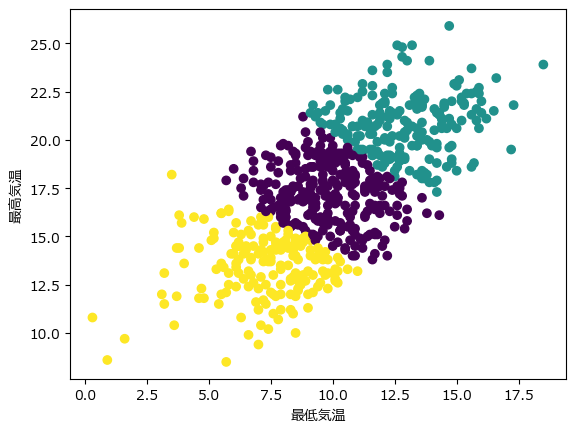

In [7]:
from sklearn import cluster

df1 = dataset[["最低気温", "最高気温"]].copy()

# k平均法（K-Means clustering）
km = cluster.KMeans(n_clusters=3, tol=0.001)
    
# 学習
km.fit(df1)
group = km.predict(df1)

# 表示
plt.scatter(df1["最低気温"], df1["最高気温"], c=group)
plt.xlabel("最低気温")
plt.ylabel("最高気温")
plt.show()

平均気温と、最高・最低気温の差を使用してみる

C:\Users\DE\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


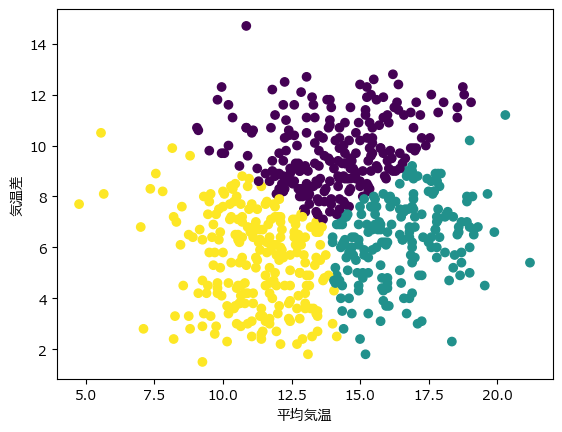

In [8]:
# 平均気温と気温差を求める
df1["平均気温"] = (df1["最低気温"] + df1["最高気温"]) / 2.0
df1["気温差"] = df1["最高気温"] - df1["最低気温"]

# k平均法（K-Means clustering）
km = cluster.KMeans(n_clusters=3, tol=0.001)
    
# 学習
km.fit(df1[["平均気温", "気温差"]])
group = km.predict(df1[["平均気温", "気温差"]])

# 表示
plt.scatter(df1["平均気温"], df1["気温差"], c=group)
plt.xlabel("平均気温")
plt.ylabel("気温差")
plt.show()

### 設問2（分類）

In [9]:
#線形モデルを定義
from sklearn import linear_model, metrics

df2 = dataset[["最高気温", "最低気温", "降水量", "日照時間", "最大風速"]].copy()

# ロジスティック回帰
logr = linear_model.LogisticRegression(penalty='none')

# 学習
logr.fit(X=df2, y=dataset["晴の日"])
logr.intercept_, logr.coef_, logr.n_iter_

C:\Users\DE\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


(array([-0.70044319]),
 array([[-0.15330955,  0.11116913, -0.01414185,  1.50246021, -0.1160817 ]]),
 array([44]))

In [10]:
# 予測値を計算
pred2 = logr.predict(df2)

# 正解率を表示する
accuracy = metrics.accuracy_score(dataset["晴の日"], pred2)
f'Accuracy = {accuracy: .3f}'

'Accuracy =  0.947'

In [11]:
# 混同行列の表示
metrics.confusion_matrix(dataset["晴の日"], pred2)

array([[171,  15],
       [ 20, 454]], dtype=int64)

In [12]:
dataset.loc[dataset["晴の日"] & ~(pred2)]

,年,月,日,最高気温,最低気温,降水量,日照時間,最大風速,最大風向,天気概況昼,天気概況夜,晴の日
44,2002,11,15,15.0,9.3,0.0,1.1,5.1,東北東,曇一時晴,曇,True
72,2003,11,13,15.1,11.7,0.0,1.3,6.6,北,曇時々晴,曇後晴,True
101,2004,11,12,21.5,16.5,29.0,0.7,7.5,南西,雨後曇一時晴,曇一時晴,True
179,2006,11,30,13.0,8.8,0.0,1.2,5.8,北東,雨時々曇後晴,晴,True
263,2009,11,24,14.0,8.4,1.0,0.9,4.1,北北西,曇一時晴,雨一時曇,True
270,2010,11,1,19.6,14.2,50.5,2.3,7.0,北西,曇時々雨後晴,晴一時曇,True
317,2011,11,18,14.3,10.5,0.0,1.1,3.8,北北西,曇後一時晴,曇後一時雨,True
348,2012,11,19,9.9,6.6,0.0,0.4,4.3,北西,曇後一時晴,快晴,True
366,2013,11,7,17.8,12.8,4.5,0.4,3.1,北西,雨後曇一時晴,快晴,True
371,2013,11,12,12.5,7.9,0.0,1.5,4.5,北北西,曇後晴,晴,True


最大風向が「北西」または「北北西」の場合、晴の日になり易い

In [13]:
# 最大風向が「北西」の条件を追加
df2["北西"] = [1 if "北西" in s else 0 for s in dataset["最大風向"]]

# ロジスティック回帰
logr = linear_model.LogisticRegression(penalty='none')

# 学習
logr.fit(X=df2, y=dataset["晴の日"])
logr.intercept_, logr.coef_, logr.n_iter_

C:\Users\DE\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


(array([-0.4673818]),
 array([[-0.15527928,  0.10661936, -0.01279829,  1.50231634, -0.12651415,
         -0.18079549]]),
 array([62]))

In [14]:
# 予測値を計算
pred2 = logr.predict(df2)

# 正解率を表示する
accuracy = metrics.accuracy_score(dataset["晴の日"], pred2)
f'Accuracy = {accuracy: .3f}'

'Accuracy =  0.952'

### 設問3（回帰）

In [15]:
from sklearn import linear_model, metrics

df3 = dataset[["最低気温", "日照時間"]].copy()

# 最小二乗法
lr = linear_model.LinearRegression()

# 学習
lr.fit(X=df3, y=dataset["最高気温"])
lr.intercept_, lr.coef_

(5.971985045190047, array([0.90111537, 0.44636418]))

In [16]:
# 予測値を計算
pred3 = lr.predict(df3)

# RMSEを計算
rms = metrics.mean_squared_error(y_true=dataset["最高気温"], y_pred=pred3, squared=False)
rms

1.7661710132839363

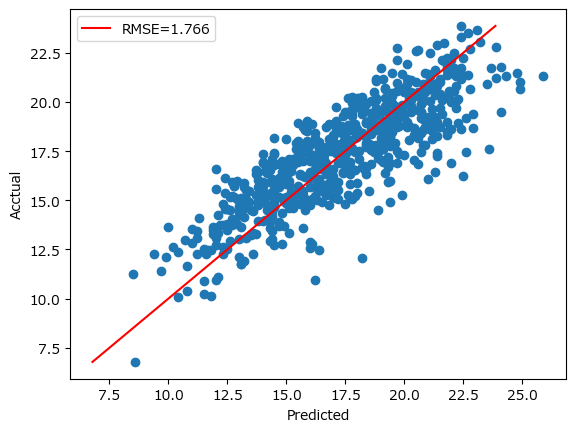

In [17]:
# 散布図の表示
xmin = pred3.min()
xmax = pred3.max()

plt.scatter(dataset["最高気温"], pred3)
plt.plot([xmin, xmax], [xmin, xmax], color='red', label="RMSE=%.3f" % rms)

plt.xlabel('Predicted')
plt.ylabel('Acctual')
plt.legend()
plt.show()

In [18]:
# 予測値が過大なデータの確認
df3[pred3 - dataset["最高気温"] > 3]

,最低気温,日照時間
82,9.0,3.4
116,14.0,9.3
119,8.3,5.6
161,10.6,7.6
198,7.6,8.5
229,6.6,9.5
235,8.5,8.4
285,7.1,8.1
296,10.0,7.1
350,8.9,9.2


北風が強い時は最高気温が上がりにくい。

In [19]:
# 北風を考慮
df3["北"] = [1 if "北" in s else 0 for s in dataset["最大風向"]]
df3["北風"] = df3["北"] * dataset["最大風速"]

lr.fit(X=df3, y=dataset["最高気温"])
lr.intercept_, lr.coef_

(7.253808461462199,
 array([ 0.87269657,  0.41568835, -0.46948663, -0.12459753]))

In [20]:
# 予測値を計算
pred3 = lr.predict(df3)

# RMSEを計算
rms = metrics.mean_squared_error(y_true=dataset["最高気温"], y_pred=pred3, squared=False)
rms

1.694288912604066

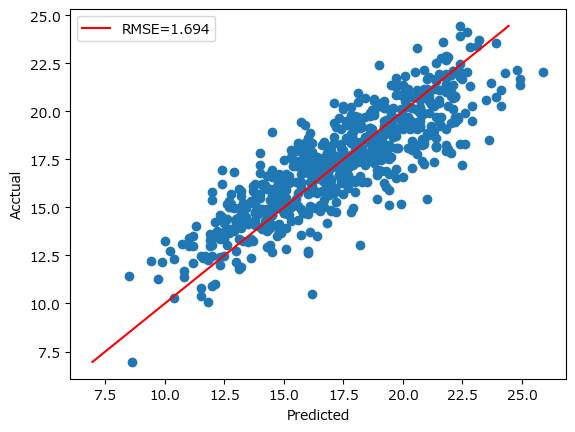

In [21]:
# 散布図の表示
xmin = pred3.min()
xmax = pred3.max()

plt.scatter(dataset["最高気温"], pred3)
plt.plot([xmin, xmax], [xmin, xmax], color='red', label="RMSE=%.3f" % rms)

plt.xlabel('Predicted')
plt.ylabel('Acctual')
plt.legend()
plt.show()